In [1]:
%%bash
pip install tifffile -q

### **Library Imports**

In [2]:
import os
import gc
import cv2
import math
import psutil
import random as r
import numpy as np
import tifffile as tifi
import matplotlib.pyplot as plt

from time import sleep

sleep_time: float = 3.5

### **Helpers**

In [3]:
def breaker(num: int=50, char: str="*") -> None:
    print("\n" + num*char + "\n")


def get_ram_usage() -> None:
    print(f"RAM Usage : {psutil.virtual_memory().percent / 100 * 16:.2f} GB")
    

def preprocess_keep_aspect_ratio(image: np.ndarray, size: int=1024) -> np.ndarray:
    h, w, _ = image.shape

    scale = min(size / w, size / h)
    nh, nw = math.ceil(h * scale), math.ceil(w * scale)

    image = cv2.resize(src=image, dsize=(nw, nh), interpolation=cv2.INTER_AREA)
    new_image = np.ones((size, size, 3), dtype=np.uint8) * 127
    hh: int = (size - nh) // 2
    ww: int = (size - nw) // 2

    if abs(nh-(size - 2*hh)) == 1: new_image[hh:size-hh-1, ww:size-ww, :] = image
    elif abs(nw-(size - 2*ww)) == 1: new_image[hh:size-hh, ww:size-ww-1, :] = image
    else: new_image[hh:size-hh, ww:size-ww, :] = image
    
    return new_image


def preprocess(image: np.ndarray, size: int=1024) -> np.ndarray:
    return cv2.resize(src=image, dsize=(size, size), interpolation=cv2.INTER_AREA)


def show(image: np.ndarray, title: str=None) -> None:
    plt.figure()
    plt.imshow(image)
    if title: plt.title(title)
    plt.show()

In [4]:
filenames = os.listdir("../input/mayo-clinic-strip-ai/train")
index = r.randint(0, len(filenames)-1)

### **Test 1**


**************************************************

RAM Usage : 0.77 GB

**************************************************



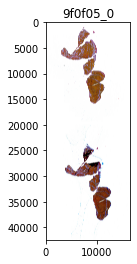


**************************************************

RAM Usage : 4.45 GB

**************************************************



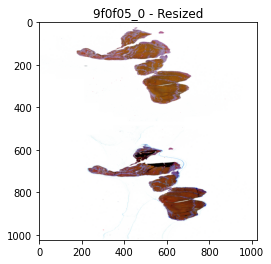


**************************************************

RAM Usage : 4.45 GB

**************************************************

RAM Usage : 0.88 GB

**************************************************

RAM Usage : 0.88 GB

**************************************************

RAM Usage : 0.88 GB

**************************************************



In [5]:
breaker()
get_ram_usage()
breaker()

image = tifi.imread(f"../input/mayo-clinic-strip-ai/train/{filenames[index]}")
show(image, title=f"{filenames[index][:-4]}")

breaker()
get_ram_usage()
breaker()

process_image = preprocess(image)
show(process_image, title=f"{filenames[index][:-4]} - Resized")

breaker()
get_ram_usage()

del image, process_image
gc.collect()

sleep(sleep_time)
breaker()
get_ram_usage()

sleep(sleep_time)
breaker()
get_ram_usage()

sleep(sleep_time)
breaker()
get_ram_usage()

breaker()

### **Test 2**


**************************************************

RAM Usage : 0.88 GB

**************************************************



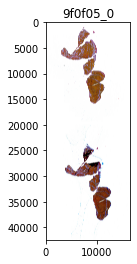


**************************************************

RAM Usage : 4.45 GB

**************************************************



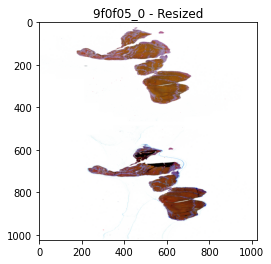


**************************************************

RAM Usage : 2.67 GB

**************************************************

RAM Usage : 0.90 GB

**************************************************

RAM Usage : 0.90 GB

**************************************************

RAM Usage : 0.90 GB

**************************************************



In [6]:
breaker()
get_ram_usage()
breaker()

image = tifi.imread(f"../input/mayo-clinic-strip-ai/train/{filenames[index]}")
show(image, title=f"{filenames[index][:-4]}")

breaker()
get_ram_usage()
breaker()

image = preprocess(image)
show(image, title=f"{filenames[index][:-4]} - Resized")

breaker()
get_ram_usage()

del image
gc.collect()

sleep(sleep_time)
breaker()
get_ram_usage()

sleep(sleep_time)
breaker()
get_ram_usage()

sleep(sleep_time)
breaker()
get_ram_usage()

breaker()